In [1]:
!pip install transformers Pillow matplotlib torch 
!pip install accelerate 
!pip install timm 

Image loaded from local path: C:\Users\hp\OneDrive\Pictures\ai07.jpg with size: (269, 180)


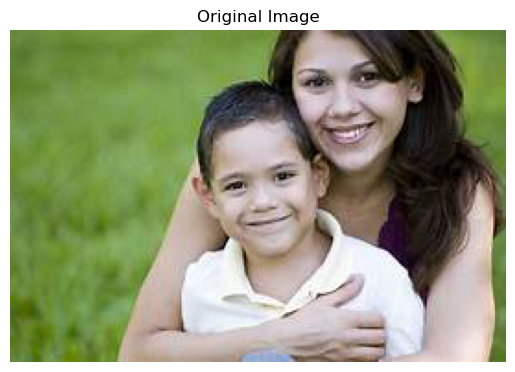

In [2]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from transformers import pipeline

# --- Load your image ---
# Option 1: Load from a local file
# Replace 'path/to/your/image.jpg' with the actual path to your image file
image_path = 'C:\\Users\\hp\\OneDrive\\Pictures\\ai07.jpg'
try:
    image = Image.open(image_path).convert('RGB')
    print(f"Image loaded from local path: {image_path} with size: {image.size}")

    # Display the image
    plt.imshow(image)
    plt.axis('off') # Hide axes
    plt.title("Original Image")
    plt.show()

except FileNotFoundError:
    print(f"Error: Image not found at path: {image_path}")
    # You might want to load a default image or exit the script here
except Exception as e:
    print(f"An error occurred while loading the image: {e}")

# Option 2: Load from a URL (commented out as you want to use Option 1)
# image_url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-img/cat-chonk.png"
# try:
#     response = requests.get(image_url, stream=True)
#     response.raise_for_status()
#     image = Image.open(response.raw).convert('RGB')
#     print(f"Image loaded from URL: {image_url} with size: {image.size}")
#
#     # Display the image
#     plt.imshow(image)
#     plt.axis('off') # Hide axes
#     plt.title("Original Image")
#     plt.show()
#
# except requests.exceptions.RequestException as e:
#     print(f"Error fetching image from URL: {e}")
# except Exception as e:
#     print(f"An error occurred while loading the image from URL: {e}")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


Performing object detection...

--- Object Detection Results (Raw) ---
{'score': 0.7858425974845886, 'label': 'person', 'box': {'xmin': 52, 'ymin': 0, 'xmax': 267, 'ymax': 180}}
{'score': 0.9801198840141296, 'label': 'person', 'box': {'xmin': 52, 'ymin': 27, 'xmax': 225, 'ymax': 180}}
{'score': 0.940809965133667, 'label': 'person', 'box': {'xmin': 139, 'ymin': 0, 'xmax': 267, 'ymax': 180}}

--- Detected Objects ---
- person (Confidence: 0.79) at Box: {'xmin': 52, 'ymin': 0, 'xmax': 267, 'ymax': 180}
- person (Confidence: 0.98) at Box: {'xmin': 52, 'ymin': 27, 'xmax': 225, 'ymax': 180}
- person (Confidence: 0.94) at Box: {'xmin': 139, 'ymin': 0, 'xmax': 267, 'ymax': 180}


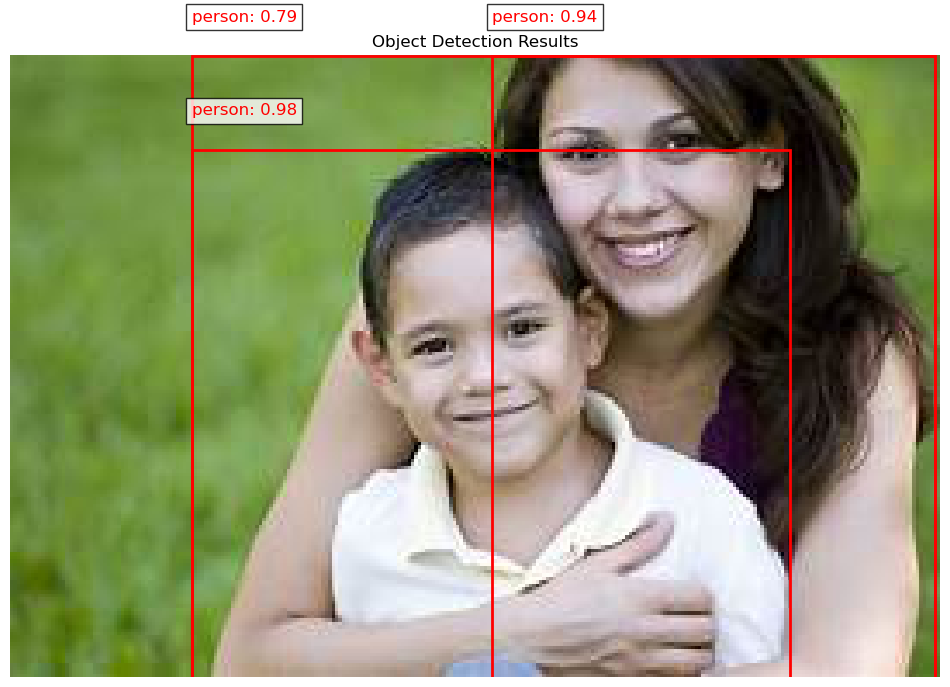

In [6]:
# Load the object detection pipeline
# Using a common pre-trained DETR model
object_detector = pipeline("object-detection", model="facebook/detr-resnet-50")

# Perform object detection
print("Performing object detection...")
detections = object_detector(image)

# Print the raw detection results
print("\n--- Object Detection Results (Raw) ---")
for detection in detections:
    print(detection)

# --- Visualize the detections ---
fig, ax = plt.subplots(1, figsize=(12, 9))
ax.imshow(image)

print("\n--- Detected Objects ---")
for detection in detections:
    box = detection['box']
    label = detection['label']
    score = detection['score']

    # Draw bounding box
    xmin, ymin, xmax, ymax = box['xmin'], box['ymin'], box['xmax'], box['ymax']
    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                             linewidth=2, edgecolor='red', facecolor='none')
    ax.add_patch(rect)

    # Add label and confidence score
    plt.text(xmin, ymin - 10, f"{label}: {score:.2f}", color='red', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    print(f"- {label} (Confidence: {score:.2f}) at Box: {box}")

ax.axis('off') # Hide axes
plt.title("Object Detection Results")
plt.show()

In [7]:
# Load the image-to-text pipeline
# Using a common pre-trained ViT-GPT2 model
image_captioner = pipeline("image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

# Generate the image description
print("Generating image description...")
caption_result = image_captioner(image)

# Extract and print the generated text
if caption_result and len(caption_result) > 0:
    description = caption_result[0]['generated_text']
    print("\n--- Image Description ---")
    print(description)
else:
    print("Could not generate image description.")

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "architectures": [
    "ViTModel"
  ],
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 224,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": true,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3"
}

Config of the decoder: <class 'transformers.models.gpt2.modeling_gpt2.GPT2LMHeadModel'> is overwritten by shared decoder config: GPT2Config {
  "activation_function": "gelu_new",
  "add_cross_attention": true,
  "architectures": [
    "GPT2LMHeadModel"
  ],
  "attn_pdrop": 0.1,
  "bos_token_id": 50256,
  "decoder_start_to

Generating image description...


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.



--- Image Description ---
a woman and a child smile as they pose for a picture 
